In [150]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
import math
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import warnings
%matplotlib inline

In [25]:
stock = pd.read_csv('SH600000.csv')
stock

,Time,Open,High,Low,Close,Volume
0,Day1,154.6414,159.7405,154.4560,156.9592,45036400
1,Day2,156.9592,158.7207,156.3102,156.5883,21043100
2,Day3,156.5883,158.5353,155.8467,158.4426,23335200
3,Day4,158.9988,162.1510,158.9988,159.5551,33835300
4,Day5,159.5551,160.8530,158.6280,160.0186,29530100
...,...,...,...,...,...,...
751,Day752,157.8890,159.6702,157.5073,158.0162,40150148
752,Day753,158.5252,158.5252,154.8356,155.2172,37033892
753,Day754,155.3445,156.3623,155.2172,156.2351,21671028
754,Day755,156.3623,156.3623,155.2172,155.7262,13678175


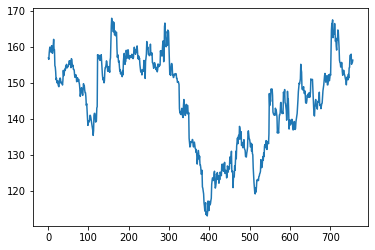

In [26]:
plt.plot(range(1,757),stock['Close'])
plt.show()

In [140]:
data = pd.read_csv("merged1.csv")
df = data.loc[:,['volume_adi',
 'volume_obv',
 'volume_cmf',
 'volume_fi',
 'momentum_mfi',
 'volume_em',
 'volume_vpt',
 'volatility_bbm',
 'volatility_bbp',
 'volatility_dcl',
 'trend_macd_signal',
 'trend_macd_diff',
 'trend_sma_fast',
 'trend_sma_slow',
 'trend_ema_fast',
 'trend_adx_pos',
 'trend_vortex_ind_neg',
 'trend_mass_index',
 'trend_cci',
 'trend_dpo',
 'trend_kst_diff',
 'trend_visual_ichimoku_a',
 'trend_visual_ichimoku_b',
 'trend_aroon_up',
 'momentum_rsi',
 'momentum_tsi',
 'momentum_uo',
 'momentum_stoch',
 'momentum_stoch_signal',
 'momentum_wr',
 'momentum_ao',
 'momentum_kama',
 'others_cr',
 'volumelag',
 'rsilag',
 'ADlag',
 'MA5lag',
 'MA15lag',
 'day5Returnlag',
 'day15Returnlag']]
df

,volume_adi,volume_obv,volume_cmf,volume_fi,momentum_mfi,volume_em,volume_vpt,volatility_bbm,volatility_bbp,volatility_dcl,...,momentum_ao,momentum_kama,others_cr,volumelag,rsilag,ADlag,MA5lag,MA15lag,day5Returnlag,day15Returnlag
0,3.063381e+07,148152100,0.177187,1.135583e+07,82.165456,2.753187,82107.80006,151.303830,0.995992,148.9861,...,0.544808,151.983218,-1.417630,14985200,59.516141,0.833348,153.67722,151.792107,1.274256,2.204542
1,3.323758e+07,159437000,0.213421,9.733568e+06,80.972345,3.465869,108520.12350,151.558785,0.932202,148.9861,...,1.076797,152.394946,-1.417630,11284900,59.516141,0.230731,154.06660,152.014613,0.906853,2.392627
2,3.435995e+07,168039900,0.231739,8.912816e+06,88.209463,11.490009,25775.21335,151.860095,0.936158,148.9861,...,1.536806,152.932271,-1.122266,8602900,61.223537,0.130463,154.43744,152.286567,0.843406,3.461064
3,2.689639e+07,159865600,0.211248,6.448678e+06,83.817927,2.419422,-27937.89670,152.119685,0.777104,149.4496,...,1.975551,153.037263,-1.771989,8174300,55.662320,-0.913052,154.49308,152.564700,0.362124,2.654348
4,1.344049e+07,173321500,0.139034,6.062022e+06,81.527797,-1.150044,-29441.88966,152.328285,0.783963,149.4496,...,2.378031,153.069413,-1.594809,13455900,56.814345,-1.000000,154.65996,152.849013,-0.179728,2.903025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,6.938033e+08,3275272818,0.144233,3.364228e+07,70.350414,1.633021,47073.03172,152.901710,1.031117,149.4920,...,0.900319,154.990359,0.592383,23789908,62.404014,-0.500000,156.36230,152.918667,2.392746,4.198110
708,6.725466e+08,3315422966,0.115155,2.956582e+07,76.663152,1.713344,51527.43373,153.175245,0.966245,149.4920,...,2.128813,155.604474,0.673423,40150148,62.745694,-0.529428,157.12566,153.351233,2.390708,4.633532
709,6.431733e+08,3278389074,0.066075,1.053387e+07,73.558267,-19.012444,-623649.03380,153.257940,0.686041,149.4920,...,2.973385,155.580492,-1.109843,37033892,51.626945,-0.793148,157.30376,153.631133,-1.533547,2.866762
710,6.600298e+08,3300060102,0.114985,1.218031e+07,73.897313,-4.706206,-513878.57680,153.397890,0.761562,149.4920,...,3.095741,155.644403,-0.461330,21671028,54.766169,0.777836,157.02386,153.987373,-0.967725,4.510676


In [143]:
data.PROClag.max()

9.602465509

In [144]:
data.PROClag.quantile(q=0.75)

0.5471352082500001

In [202]:
Y = pd.Series(map(lambda x:(0 if x<=-5 else (1 if x<=-1 else (2 if x<=-0.5 else (3 if x<=0 else (4 if x<=0.5 else (5 if x<=0.1 else 6)))))), data.iloc[:460,79]))
X = pd.DataFrame(StandardScaler().fit_transform(data.iloc[:460,1:]),columns=data.iloc[:460,1:].columns)
X

,volume_adi,volume_obv,volume_cmf,volume_fi,momentum_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volatility_atr,...,rsilag,fastKlag,fastDlag,ADlag,OBVlag,MA5lag,MA15lag,day5Returnlag,day15Returnlag,PROClag
0,-1.693564,-1.535176,0.924136,-0.064059,1.853910,0.305179,0.898448,-0.053861,1.725985,-0.962811,...,0.970392,1.892618,1.683717,1.516779,-1.328698,0.656185,0.514260,0.550098,0.538544,0.608099
1,-1.688055,-1.521818,1.125795,-0.091203,1.783086,0.369544,0.926594,-0.042586,1.725985,-1.045601,...,0.970392,1.682131,1.719163,0.468500,-1.328698,0.684259,0.530556,0.402221,0.579031,0.026069
2,-1.685681,-1.511634,1.227741,-0.104936,2.212687,1.094232,1.314957,-0.077908,1.750418,-0.992396,...,1.104994,1.486938,1.802535,0.294080,-1.312955,0.710996,0.550474,0.376684,0.809026,0.267378
3,-1.701471,-1.521310,1.113700,-0.146166,1.952002,0.275035,1.372144,-0.100836,1.696672,-0.944525,...,0.666576,0.945224,1.464580,-1.521158,-1.327913,0.715007,0.570845,0.182971,0.635370,-0.505703
4,-1.729938,-1.505382,0.711798,-0.152636,1.816058,-0.047336,1.391995,-0.101479,1.696672,-1.003617,...,0.757396,1.082182,1.250566,-1.672409,-1.303290,0.727039,0.591668,-0.035120,0.688901,0.171432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,0.688576,1.221017,-0.102172,-0.056520,0.032612,-0.936994,0.003576,-0.259058,-1.065696,-0.261164,...,0.672278,0.927468,1.536429,0.857765,1.229629,-0.689300,-0.900653,0.751244,0.344071,-0.710558
456,0.669177,1.208493,0.013160,-0.087862,-0.075635,1.616041,0.245326,-0.184629,-1.070616,-0.325181,...,0.639659,0.876355,1.153550,-1.440457,1.210268,-0.657274,-0.892821,-0.437593,0.083773,-0.047971
457,0.666586,1.189638,0.185620,-0.139790,-0.014832,-1.290269,0.164750,-0.130512,-1.070616,-0.416796,...,0.440062,0.569719,0.843618,-0.066577,1.181122,-0.691079,-0.895833,-0.870933,0.345905,-0.419544
458,0.640544,1.169237,-0.063495,-0.212029,-0.029350,-0.613654,0.235242,-0.201091,-1.070616,-0.363268,...,0.095165,0.007519,0.515453,-1.175358,1.149585,-0.755133,-0.894025,-0.987286,0.185156,-0.797388


In [ ]:
model = LogisticRegression()
rfecv = RFECV(estimator=model, step=1, cv=2, verbose=3, n_jobs=-1, scoring='roc_auc')
rfecv.fit(X, Y)
var_selected = pd.DataFrame(sorted(zip(map(lambda x: round(x), rfecv.ranking_), X.columns)), columns = ['rank', 'variable'])
rfecvgrid = pd.Series(rfecv.grid_scores_)

In [155]:
split = int(0.7*len(X))
X_train, X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]

In [157]:
Y_train

0      6
1      3
2      4
3      2
4      4
      ..
317    3
318    6
319    4
320    2
321    2
Length: 322, dtype: int64

In [163]:
dtrain = xgb.DMatrix(data=X_train, label=Y_train)
dtest = xgb.DMatrix(data=X_test)
params = {'max_depth': 6,
          'objective': 'multi:softmax',  # error evaluation for multiclass training
          'num_class': 7}
model = xgb.train(params, dtrain)

In [164]:
model.predict(dtest)

array([2., 2., 3., 2., 1., 4., 6., 6., 3., 2., 6., 1., 6., 2., 2., 4., 6.,
       1., 1., 3., 4., 1., 2., 1., 4., 6., 1., 3., 3., 3., 6., 6., 6., 3.,
       4., 6., 3., 3., 6., 3., 6., 6., 4., 3., 2., 3., 6., 6., 2., 1., 4.,
       4., 6., 3., 4., 3., 2., 6., 2., 6., 6., 6., 3., 3., 3., 6., 6., 4.,
       6., 2., 4., 4., 6., 2., 2., 4., 4., 2., 3., 6., 6., 3., 6., 4., 3.,
       6., 6., 4., 6., 6., 1., 2., 4., 1., 4., 6., 4., 6., 3., 6., 6., 1.,
       6., 6., 6., 1., 4., 4., 1., 6., 4., 3., 2., 4., 1., 2., 3., 2., 3.,
       4., 6., 2., 3., 2., 2., 2., 2., 4., 6., 6., 6., 6., 2., 3., 2., 2.,
       2., 2.], dtype=float32)

In [181]:
dtrain = xgb.DMatrix(data=X_train, label=Y_train)
dtest = xgb.DMatrix(data=X_test)
params = {'max_depth': 6,
          'objective': 'multi:softprob',  # error evaluation for multiclass training
          'num_class': 7}
model = xgb.train(params, dtrain)
Yprob = model.predict(dtest)
Ylabel = np.argmax(yprob, axis=1)
Ylabel

array([2, 2, 3, 2, 1, 4, 6, 6, 3, 2, 6, 1, 6, 2, 2, 4, 6, 1, 1, 3, 4, 1,
       2, 1, 4, 6, 1, 3, 3, 3, 6, 6, 6, 3, 4, 6, 3, 3, 6, 3, 6, 6, 4, 3,
       2, 3, 6, 6, 2, 1, 4, 4, 6, 3, 4, 3, 2, 6, 2, 6, 6, 6, 3, 3, 3, 6,
       6, 4, 6, 2, 4, 4, 6, 2, 2, 4, 4, 2, 3, 6, 6, 3, 6, 4, 3, 6, 6, 4,
       6, 6, 1, 2, 4, 1, 4, 6, 4, 6, 3, 6, 6, 1, 6, 6, 6, 1, 4, 4, 1, 6,
       4, 3, 2, 4, 1, 2, 3, 2, 3, 4, 6, 2, 3, 2, 2, 2, 2, 4, 6, 6, 6, 6,
       2, 3, 2, 2, 2, 2], dtype=int64)

In [186]:
prob = pd.DataFrame(Yprob, index=X_test.index)
prob

,0,1,2,3,4,5,6
322,0.030326,0.035284,0.516671,0.159760,0.196261,0.030369,0.031329
323,0.025839,0.078506,0.678202,0.136504,0.028379,0.025876,0.026694
324,0.064004,0.092605,0.068745,0.415707,0.116302,0.064096,0.178541
325,0.028721,0.050692,0.701630,0.115195,0.045330,0.028762,0.029670
326,0.054460,0.557633,0.195452,0.052423,0.082642,0.028249,0.029141
...,...,...,...,...,...,...,...
455,0.036765,0.044801,0.055347,0.646624,0.109580,0.036817,0.070065
456,0.036997,0.077979,0.356293,0.205380,0.217877,0.037050,0.068424
457,0.029738,0.057318,0.670280,0.136643,0.045519,0.029781,0.030721
458,0.030704,0.148081,0.452279,0.272850,0.033620,0.030747,0.031719


In [187]:
predicted = pd.DataFrame(Ylabel, index=X_test.index,columns=['Predicted_signal'])
report = classification_report(Y_test, predicted, output_dict=True)
report = pd.DataFrame(report).transpose()
report

,precision,recall,f1-score,support
1,0.857143,0.428571,0.571429,28.000000
2,0.241379,0.350000,0.285714,20.000000
3,0.269231,0.304348,0.285714,23.000000
4,0.240000,0.315789,0.272727,19.000000
6,0.750000,0.687500,0.717391,48.000000
accuracy,0.471014,0.471014,0.471014,0.471014
macro avg,0.471551,0.417242,0.426595,138.000000
weighted avg,0.547680,0.471014,0.492046,138.000000


In [188]:
confusion_matrix(Y_test, predicted)

array([[12, 13,  2,  0,  1],
       [ 1,  7,  9,  2,  1],
       [ 1,  6,  7,  5,  4],
       [ 0,  3,  5,  6,  5],
       [ 0,  0,  3, 12, 33]], dtype=int64)

In [200]:
X_t = pd.concat([stock[split:460]['Close'],predicted], axis=1)
X_t

,Close,Predicted_signal
322,150.4302,2
323,150.0639,2
324,149.5755,3
325,142.9820,2
326,141.7610,1
...,...,...
455,125.3661,3
456,125.2427,2
457,125.4895,2
458,120.9240,2


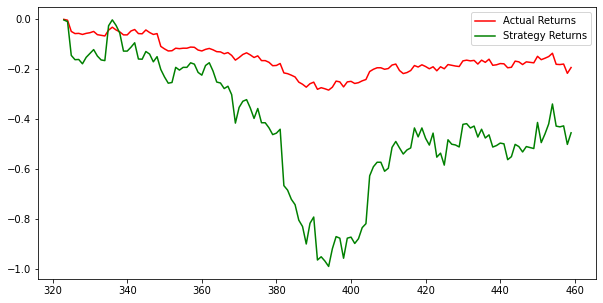

In [201]:
X_t['Actual_returns'] = np.log(X_t['Close']/X_t['Close'].shift(1))
Cumulative_returns = np.cumsum(X_t['Actual_returns'])

X_t['Strategy_returns'] = X_t['Actual_returns']* X_t['Predicted_signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(X_t['Strategy_returns'])

X_test.head()
plt.figure(figsize=(10,5))
plt.plot(Cumulative_returns, color='r',label = 'Actual Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()